In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# IAU 티커 불러오기
iau = yf.Ticker("IAU")

# 최근 6개월간 주가 데이터 가져오기
iau_history = iau.history(period="6mo")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(iau_history.index, iau_history['Close'], label='IAU (iShares Gold Trust)', linewidth=2)
plt.title("IAU (iShares Gold Trust) - Last 6 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


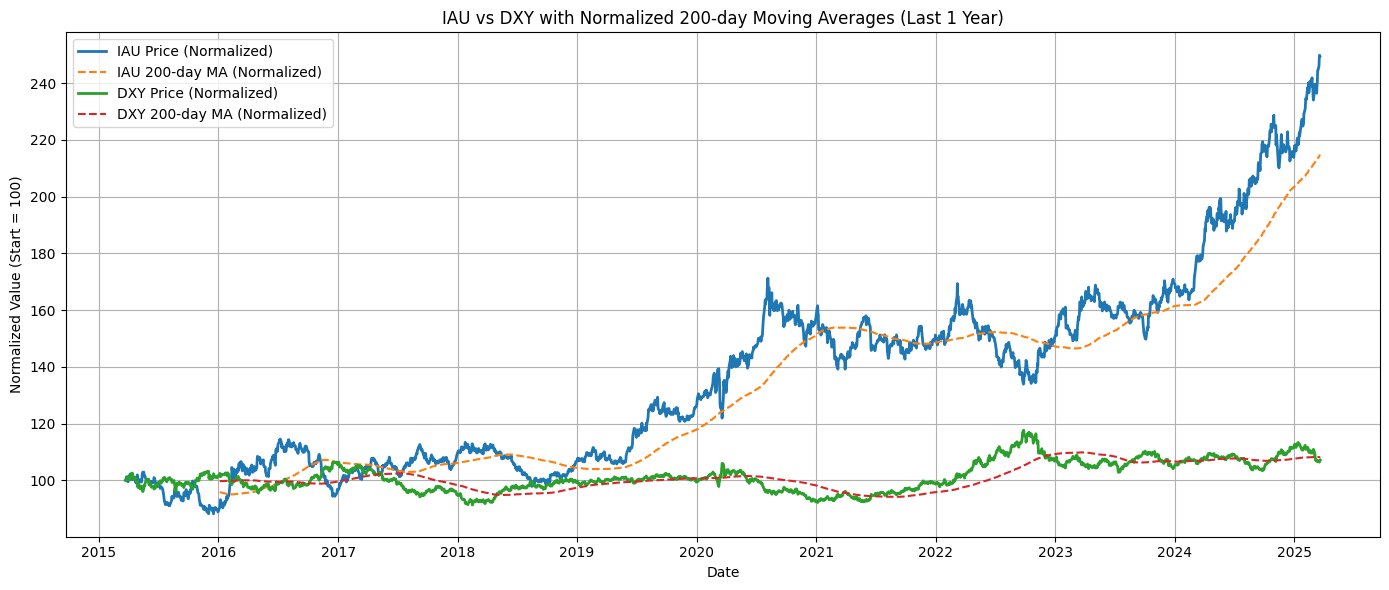

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# 티커 불러오기
iau = yf.Ticker("IAU")
dxy = yf.Ticker("DX-Y.NYB")

# 1년치 데이터 가져오기
iau_history = iau.history(period="10y")
dxy_history = dxy.history(period="10y")

# 기준값: 각각의 첫 번째 종가
iau_base = iau_history['Close'].iloc[0]
dxy_base = dxy_history['Close'].iloc[0]

# 200일 이동평균선 계산
iau_history['MA200'] = iau_history['Close'].rolling(window=200).mean()
dxy_history['MA200'] = dxy_history['Close'].rolling(window=200).mean()

# 정규화
iau_history['Close_norm'] = iau_history['Close'] / iau_base * 100
iau_history['MA200_norm'] = iau_history['MA200'] / iau_base * 100
dxy_history['Close_norm'] = dxy_history['Close'] / dxy_base * 100
dxy_history['MA200_norm'] = dxy_history['MA200'] / dxy_base * 100

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(iau_history.index, iau_history['Close_norm'], label='IAU Price (Normalized)', linewidth=2)
plt.plot(iau_history.index, iau_history['MA200_norm'], label='IAU 200-day MA (Normalized)', linestyle='--')
plt.plot(dxy_history.index, dxy_history['Close_norm'], label='DXY Price (Normalized)', linewidth=2)
plt.plot(dxy_history.index, dxy_history['MA200_norm'], label='DXY 200-day MA (Normalized)', linestyle='--')

plt.title("IAU vs DXY with Normalized 200-day Moving Averages (Last 1 Year)")
plt.xlabel("Date")
plt.ylabel("Normalized Value (Start = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# !pip install pandas_datareader

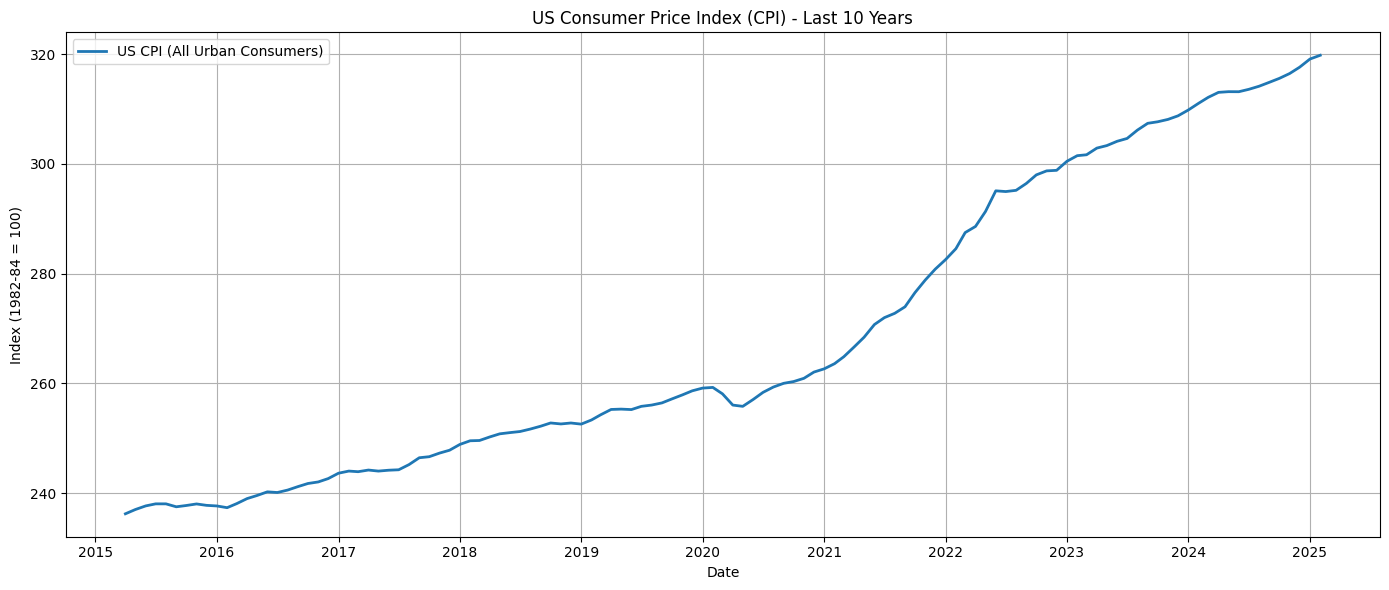

In [10]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# 날짜 설정: 오늘 기준으로 10년 전부터
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365 * 10)

# FRED에서 CPI 데이터 불러오기
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(cpi.index, cpi['CPIAUCSL'], label='US CPI (All Urban Consumers)', linewidth=2)
plt.title("US Consumer Price Index (CPI) - Last 10 Years")
plt.xlabel("Date")
plt.ylabel("Index (1982-84 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


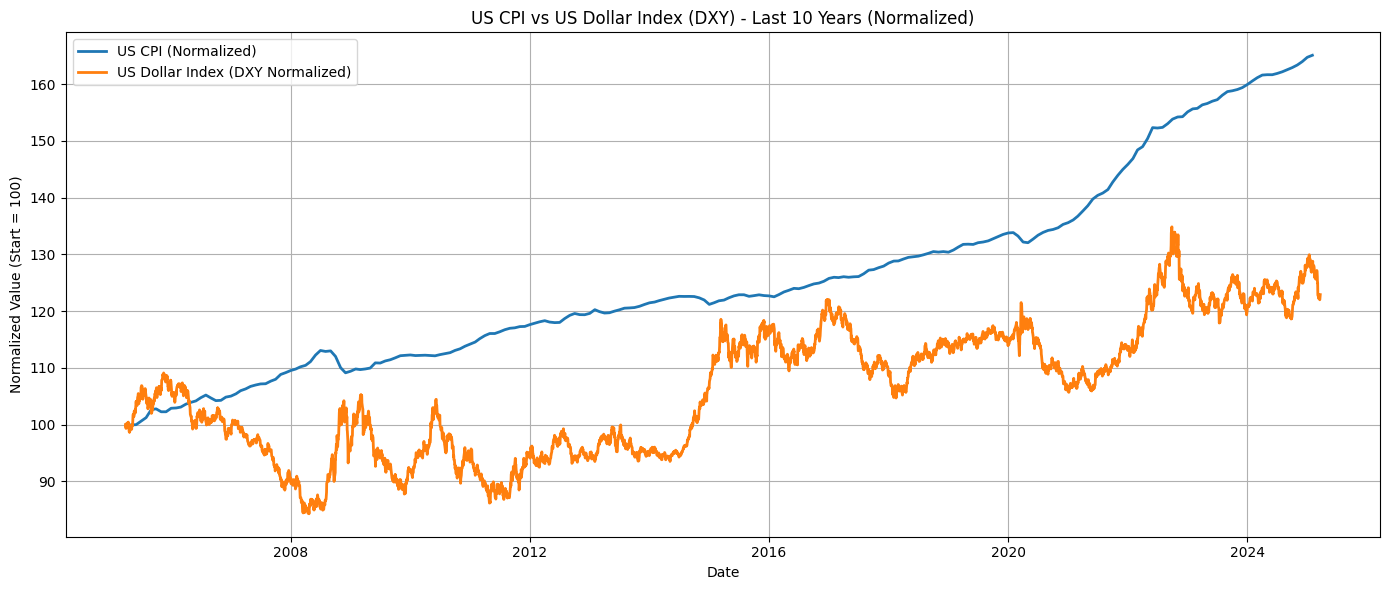

In [38]:
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# 날짜 설정 (최근 10년)
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365 * 20)

# CPI 데이터 (FRED)
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)

# DXY 데이터 (yfinance)
dxy = yf.Ticker("DX-Y.NYB")
dxy_history = dxy.history(start=start, end=end)

# 정규화 (처음 값을 100으로)
cpi_base = cpi['CPIAUCSL'].iloc[0]
dxy_base = dxy_history['Close'].iloc[0]

cpi['CPI_norm'] = cpi['CPIAUCSL'] / cpi_base * 100
dxy_history['DXY_norm'] = dxy_history['Close'] / dxy_base * 100

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(cpi.index, cpi['CPI_norm'], label='US CPI (Normalized)', linewidth=2)
plt.plot(dxy_history.index, dxy_history['DXY_norm'], label='US Dollar Index (DXY Normalized)', linewidth=2)
plt.title("US CPI vs US Dollar Index (DXY) - Last 10 Years (Normalized)")
plt.xlabel("Date")
plt.ylabel("Normalized Value (Start = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


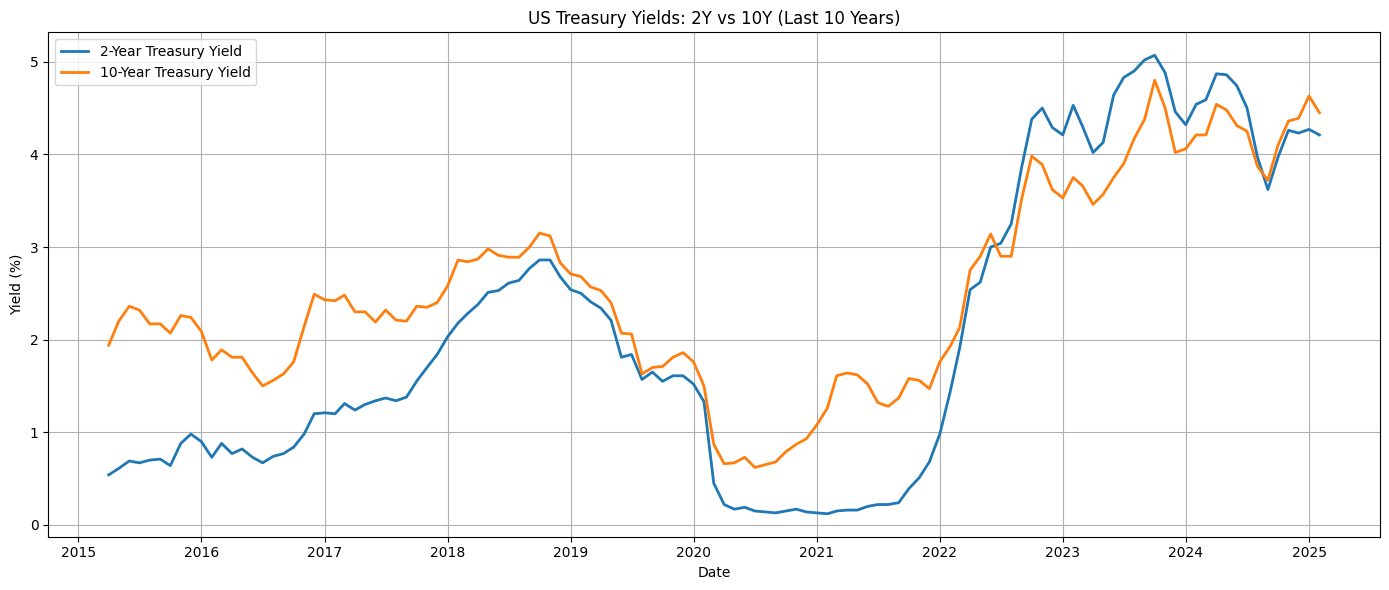

In [21]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# 날짜 설정
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365 * 10)

# 데이터 불러오기
t2 = web.DataReader('GS2', 'fred', start, end)     # 2년물
t10 = web.DataReader('GS10', 'fred', start, end)   # 10년물

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(t2.index, t2['GS2'], label='2-Year Treasury Yield', linewidth=2)
plt.plot(t10.index, t10['GS10'], label='10-Year Treasury Yield', linewidth=2)
plt.title("US Treasury Yields: 2Y vs 10Y (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
import json
import math

def find_unserializable_keys(obj, path=""):
    bad_keys = []

    if isinstance(obj, dict):
        for k, v in obj.items():
            key_path = f"{path}.{k}" if path else k
            bad_keys += find_unserializable_keys(v, key_path)

    elif isinstance(obj, list):
        for i, item in enumerate(obj):
            item_path = f"{path}[{i}]"
            bad_keys += find_unserializable_keys(item, item_path)

    else:
        try:
            json.dumps(obj, allow_nan=False)
        except (TypeError, ValueError):
            bad_keys.append(path)

    return bad_keys

# 사용 예시
data = {
    "a": 1,
    "b": float("inf"),
    "c": {
        "d": set([1, 2]),
        "e": [1, 2, float("nan")]
    }
}

bad = find_unserializable_keys(data)
print("문제가 되는 키들:", bad)


문제가 되는 키들: ['b', 'c.d', 'c.e[2]']
